In [38]:
import pandas as pd 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
import seaborn as sns
import re

In [39]:
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hires\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hires\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
data = pd.read_csv('iphone_data.csv') 
data.head()

,rating,review
0,1.0,Very bad experience with this iPhone 15pro pho...
1,5.0,Amazing phone with amazing camera coming from ...
2,1.0,So I got the iPhone 15pro just today. The prod...
3,5.0,I've been an android user all my life until I ...
4,1.0,I was delivered a phone that did not work imme...


In [41]:
data.dtypes

rating    float64
review     object
dtype: object

In [42]:
pd.unique(data['rating'])

array([ 1.,  5.,  4.,  2.,  3., nan])

<AxesSubplot: xlabel='rating', ylabel='count'>

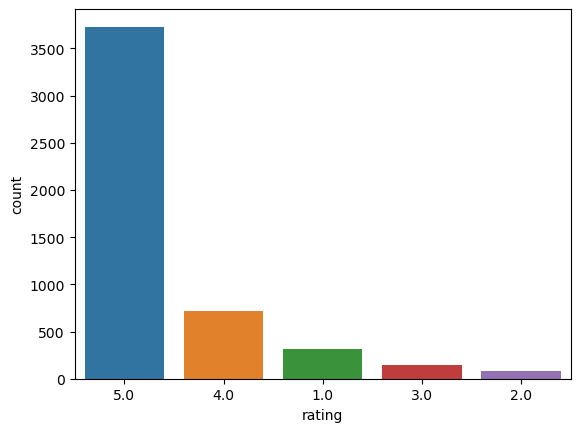

In [43]:
sns.countplot(data=data, 
              x='rating', 
              order=data.rating.value_counts().index)

In [44]:
pos_neg = [] 
for i in range(len(data['rating'])): 
    if data['rating'][i] >= 5: 
        pos_neg.append(1) 
    else: 
        pos_neg.append(0) 
data['label'] = pos_neg 

In [45]:
from tqdm import tqdm 
def preprocess_text(text_data): 
    preprocessed_text = [] 
  
    for sentence in tqdm(text_data): 
        # Removing punctuations 
        sentence = re.sub(r'[^\w\s]', '', sentence) 
  
        # Converting lowercase and removing stopwords 
        preprocessed_text.append(' '.join(token.lower() 
                                          for token in nltk.word_tokenize(sentence) 
                                          if token.lower() not in stopwords.words('english'))) 
  
    return preprocessed_text 

In [46]:
preprocessed_review = preprocess_text(data['review'].values) 
data['review'] = preprocessed_review

100%|█████████████████████████████████████████████████████████████████████████████| 5005/5005 [00:15<00:00, 321.33it/s]


In [47]:
data.head()

,rating,review,label
0,1.0,bad experience iphone 15pro phone back camera ...,0
1,5.0,amazing phone amazing camera coming iphone 7 p...,1
2,1.0,got iphone 15pro today product looks amazing u...,0
3,5.0,ive android user life decided try iphone 15pro...,1
4,1.0,delivered phone work immediately removing box ...,0


In [48]:
data["label"].value_counts()

label
1    3730
0    1275
Name: count, dtype: int64

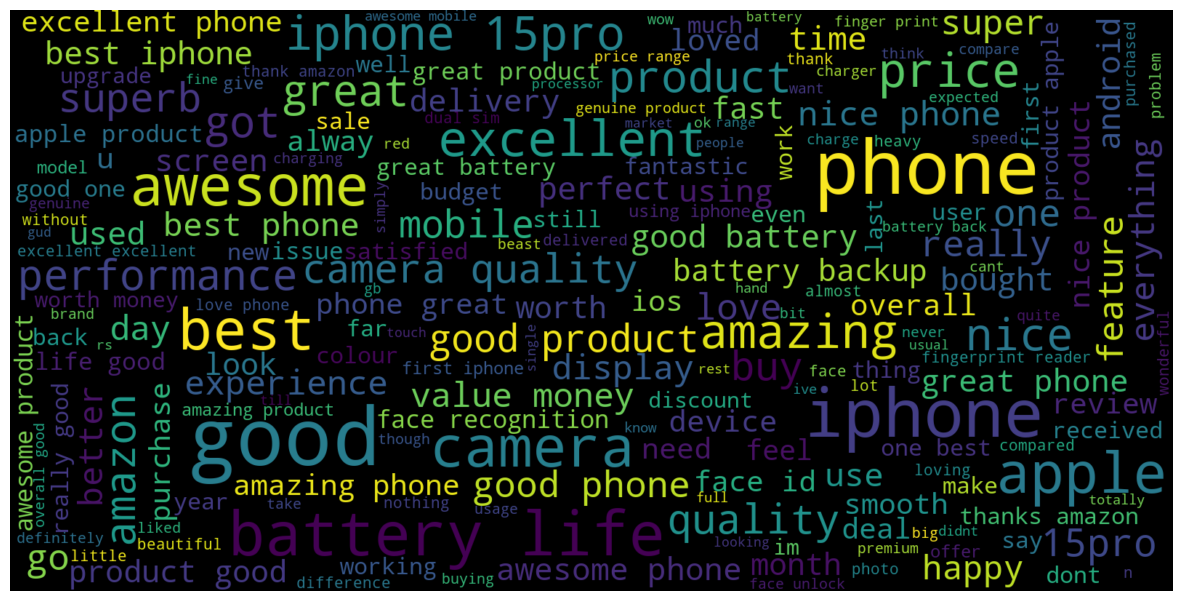

In [49]:
consolidated = ' '.join( 
    word for word in data['review'][data['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, height=800, 
                      random_state=21, max_font_size=110) 
plt.figure(figsize=(15, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show()

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Now you can use TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['review']).toarray()


In [51]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [52]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, data['label'], 
                                                    test_size=0.2, 
                                                    stratify=data['label'], 
                                                    random_state = 100)

In [60]:
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# Initialize the SVM model
svm_model = SVC(kernel='rbf', random_state=0)  # You can choose different kernels like 'linear', 'rbf', etc.

# Train the SVM model
svm_model.fit(X_train, y_train)

# Predicting on the training set
pred_train_svm = svm_model.predict(X_train)

# Prediction on the testing dataset
pred_test_svm = svm_model.predict(X_test)

# Calculating the training accuracy
train_accuracy_svm = accuracy_score(y_train, pred_train_svm)
print("SVM Train Accuracy:", train_accuracy_svm)

# Calculating the testing accuracy
test_accuracy_svm = accuracy_score(y_test, pred_test_svm)
print("SVM Test Accuracy:", test_accuracy_svm)

from sklearn.metrics import classification_report

# Assuming 'models' is a list containing your trained classifiers and 'xtest', 'ytest' are your test data
print("Classification Report:")
print(classification_report(y_test, pred_test_svm))

SVM Train Accuracy: 0.8961038961038961
SVM Test Accuracy: 0.7912087912087912
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.26      0.39       255
           1       0.79      0.97      0.87       746

    accuracy                           0.79      1001
   macro avg       0.78      0.62      0.63      1001
weighted avg       0.79      0.79      0.75      1001



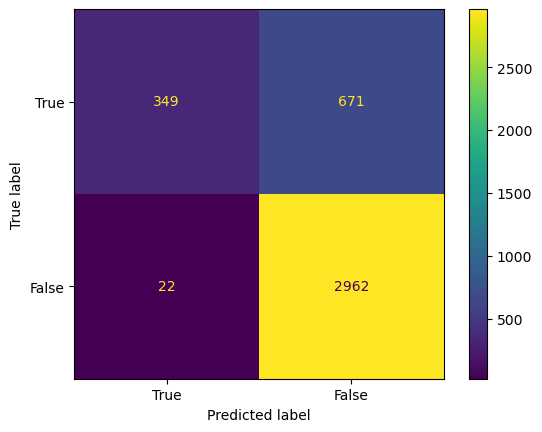

In [59]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [True, False])

cm_display.plot()
plt.show()

In [54]:
from sklearn.naive_bayes import MultinomialNB  # Import Naive Bayes classifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support


# Initialize the Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)

# Predicting on the training set
pred_train = model.predict(X_train)

# Prediction on the testing dataset
pred_test = model.predict(X_test)

# Calculating the training accuracy
train_accuracy = accuracy_score(y_train, pred_train)
print("Naive Bayes Train Accuracy:", train_accuracy)

# Calculating the testing accuracy
test_accuracy = accuracy_score(y_test, pred_test)
print("Naive Bayes Test Accuracy:", test_accuracy)

from sklearn.metrics import classification_report

# Assuming 'models' is a list containing your trained classifiers and 'xtest', 'ytest' are your test data
print("Classification Report:")
print(classification_report(y_test, pred_test))

Naive Bayes Train Accuracy: 0.8269230769230769
Naive Bayes Test Accuracy: 0.8031968031968032
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.28      0.42       255
           1       0.80      0.98      0.88       746

    accuracy                           0.80      1001
   macro avg       0.82      0.63      0.65      1001
weighted avg       0.81      0.80      0.76      1001



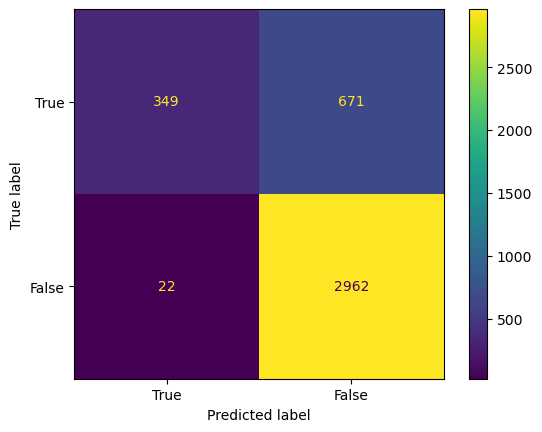

In [57]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,pred_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                            display_labels = [True, False])

cm_display.plot()
plt.show()